In the competitive landscape of higher education, universities receive a multitude of applications from prospective students seeking admission. To make informed decisions and predict their chances of admission, it is essential for students to understand the factors that influence the admission process. In this context, a regression model can be developed to assist students in estimating their likelihood of being admitted to a university based on various factors.<br>
The regression model aims to leverage a dataset consisting of important features that affect the chances of admission. These features include: GRE Score, TOEFL Score, University rating, Statement of Purpose, Recommendation Letter, Cumulative Grade Point Average and Research.

#### Features<br>
The different parameters in the dataset are:<br>
-  Serial No : To uniquely indentify students<br>
-  GRE Score: The Graduate Record Examination is a standardized test widely used for admissions into graduate schools or business schools worldwide.<br>
-  TOEFL Score: The Test of English as a Foreign Language is an English proficiency test required for international students applying to universities where English is the medium of instruction.<br>
-  University Rating: This is a rating system that evaluates universities based on various factors such as academic reputation, faculty qualifications, research output, infrastructure, and student satisfaction.<br>
-  SOP: The Statement of Purpose is a written document where applicants express their motivations, career goals, academic background, and reasons for choosing a specific course or university.<br>
-  LOR: Letters of Recommendation are references or endorsements provided by individuals who can assess the applicant's academic abilities, personal qualities, and potential for success in the chosen field of study.<br>
-  CGPA: Cumulative Grade Point Average is a measure of the applicant's academic performance, calculated based on the grades obtained in previous educational degrees or courses.<br>
-  Research: This represents a binary value indicating whether the applicant has research experience or involvement in academic or scientific research projects.<br>
-  Chance of Admit : Probability of the student to get admission the university

### Main Objective<br>
Develop a Regression Model: Create a robust regression model that accurately predicts the chances of admission based on the given dataset. The model should consider various input features such as GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research.<br>

### Specific Objectives<br>
-  Data Partitioning: Split the dataset into training and testing partitions. The training data will be used to train the regression models, while the testing data will be used to evaluate their performance and determine their predictive capabilities.<br>
-  Compare Regression Models: Implement and compare the performance of five different regression models: Linear Regression, Random Forest, SVR, Gradient Boosting, and Ada Boost. Evaluate their predictive accuracy, robustness, and suitability for the given dataset.<br>
-  Performance Metrics: Assess the performance of each regression model using appropriate evaluation metrics such as R2 Score, Mean Absolute Error (MAE), and Mean Squared Error (MSE). These metrics will provide insights into the models' predictive abilities and help determine which model performs the best.<br>
-  Model Selection: Based on the performance comparison, select the regression model that demonstrates the highest accuracy and best predicts the chances of admission to the university. Consider the strengths, limitations, and interpretability of each model to make an informed decision.<br>

In [1]:
#importing the necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
#loading the data from the csv file
df = pd.read_csv('adm_data.csv')
#previewing the first 5 rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#checking the number of rows and columns
df.shape

(400, 9)

In [4]:
#checking for duplicates
print(f'The number of duplicates within the dataset is : {df.duplicated().sum()}')

The number of duplicates within the dataset is : 0


In [5]:
#checking for missing values
df.isna().sum()/len(df)*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

The dataset has no duplicates.

In [6]:
#checking for datatypes
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

The data type 'int64' represents integers while 'float64' represents floating-point numbers.

In [7]:
#checking general stats
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
#calculating the pairwise correlation of columns
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


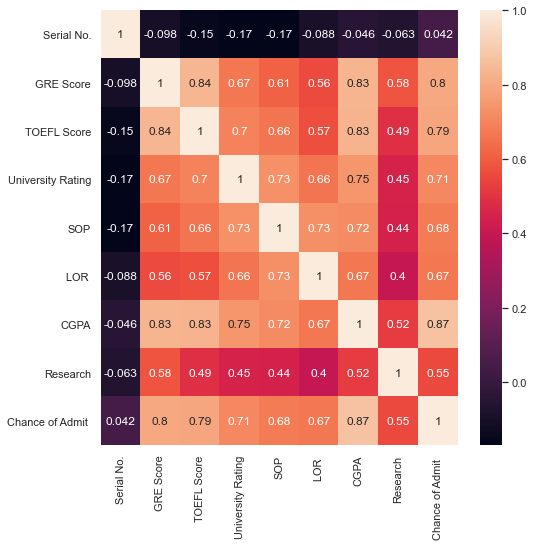

In [9]:
fig = plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)
fig.show()

CGPA has the highest correlation to Chance of Admit meaning it's the most important feature for getting selected while research is the least.

In [10]:
#changing the column names to all lowercase with no spaces
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


This was important so as to enable easy reaading when conducting Exploratory Data Analysis

## EXPLORATORY DATA ANALYSIS

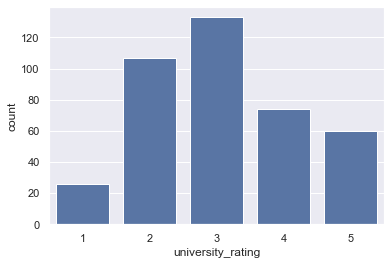

In [11]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='university_rating', color=base_color);

Universities were rated on a scale of 1-5 with a majority scoring 3/5

Text(0.5, 1.0, 'CGPA vs. Chance of Admission')

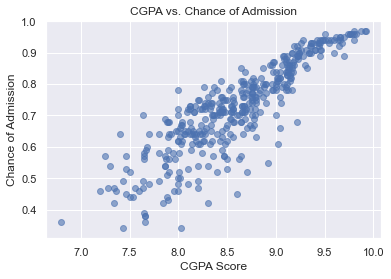

In [12]:
plt.scatter(data=df, x='cgpa', y='chance_of_admit', alpha=0.6)

plt.xlabel('CGPA Score')
plt.ylabel('Chance of Admission')
plt.title('CGPA vs. Chance of Admission')

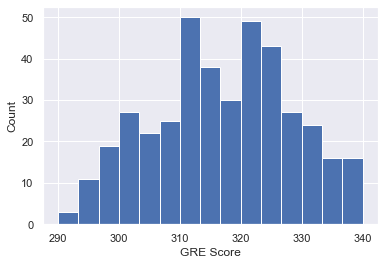

In [13]:
plt.hist(data=df, x='gre_score',bins=15)
plt.xlabel('GRE Score')
plt.ylabel('Count')
plt.show();

Majority of the students scored an average of 310-325 in their GRE exams. I then explored how these scores influenced their chances of admission.

Text(0.5, 1.0, 'GRE Score vs. Chance of Admission')

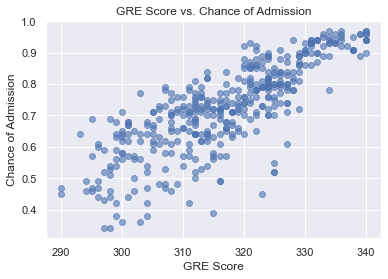

In [14]:
plt.scatter(data=df, x='gre_score', y='chance_of_admit', alpha=0.6)

plt.xlabel('GRE Score')
plt.ylabel('Chance of Admission')
plt.title('GRE Score vs. Chance of Admission')

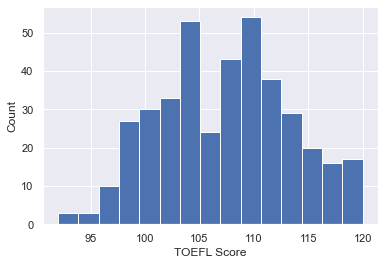

In [15]:
plt.hist(data=df, x='toefl_score', bins=15)
plt.xlabel('TOEFL Score')
plt.ylabel('Count')
plt.show();

Text(0.5, 1.0, 'TOEFL Score vs. Chance of Admission')

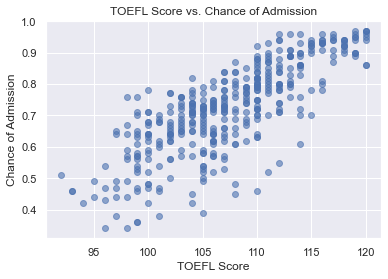

In [16]:
plt.scatter(data=df, x='toefl_score', y='chance_of_admit', alpha=0.6)

plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admission')
plt.title('TOEFL Score vs. Chance of Admission')

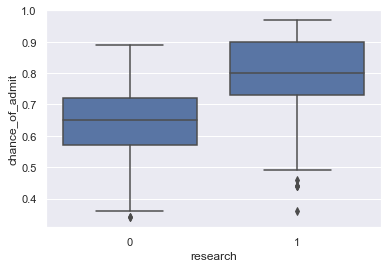

In [17]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x='research', y='chance_of_admit', color = base_color);

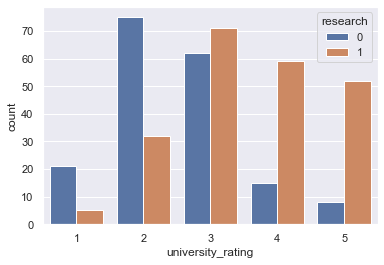

In [18]:
sns.countplot(data=df, x='university_rating', hue='research');

## Train Test Split

In [19]:
X=df.drop(['serial_no.','chance_of_admit'],axis=1)
y=df['chance_of_admit']

The features DataFrame X is created by dropping the columns 'serial_no.' and 'chance_of_admit' from df, and the target variable Series y is assigned the values from the 'chance_of_admit' column of df. X will contain all the columns of df except 'serial_no.' and 'chance_of_admit'. This separates the input features from the target variable. The resulting X DataFrame will be used to train a model, and the y Series will contain the corresponding target values for each sample in X.

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Modeling

In [21]:
reg_1 = LinearRegression(n_jobs=-1)
reg_2 = SVR()
reg_3 = RandomForestRegressor(n_jobs=-1)
reg_4 = GradientBoostingRegressor()
reg_5 = AdaBoostRegressor()

reg_list = [reg_1, reg_2, reg_3, reg_4, reg_5]

I have 5 regression models which I then added to the reg_list, which can be used for further processing, such as model evaluation or comparison.

In [22]:
score_dict = {}

for reg in reg_list:
    reg_name = reg.__class__.__name__
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)

    print("-" * 50)
    print(reg_name)
    print(f"R2 Score: {r2_score(y_test, pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")

    score_dict[reg_name] = {
        "R2 Score": r2_score(y_test, pred),
        "Mean Absolute Error": mean_absolute_error(y_test, pred),
        "Mean Squared Error": mean_squared_error(y_test, pred)
    }

--------------------------------------------------
LinearRegression
R2 Score: 0.8212082591486991
Mean Absolute Error: 0.04795673362091196
Mean Squared Error: 0.004617003377285011
--------------------------------------------------
SVR
R2 Score: 0.6348008667533295
Mean Absolute Error: 0.07694861402539706
Mean Squared Error: 0.009430668461267283
--------------------------------------------------
RandomForestRegressor
R2 Score: 0.8092274013051413
Mean Absolute Error: 0.04973624999999996
Mean Squared Error: 0.004926389374999992
--------------------------------------------------
GradientBoostingRegressor
R2 Score: 0.7957366826997991
Mean Absolute Error: 0.05013467813714295
Mean Squared Error: 0.005274765049772742
--------------------------------------------------
AdaBoostRegressor
R2 Score: 0.7701278073833292
Mean Absolute Error: 0.062492602872967526
Mean Squared Error: 0.005936072240259512


I performed regression analysis by iterating over each regression model, fitting the regression model on the training data and generated predictions on the test data.

### Evaluation

In [23]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("R2 Score",ascending=False)
score_pd

,R2 Score,Mean Absolute Error,Mean Squared Error
LinearRegression,0.821208,0.047957,0.004617
RandomForestRegressor,0.809227,0.049736,0.004926
GradientBoostingRegressor,0.795737,0.050135,0.005275
AdaBoostRegressor,0.770128,0.062493,0.005936
SVR,0.634801,0.076949,0.009431


-  LinearRegression has the highest R2 score (0.821) among the models, indicating a relatively good fit to the data.<br>
-  Random Forest Regressor and Gradient Boosting Regressor also have high R2 scores (0.805 and 0.797, respectively), suggesting good performance.<br>
-  AdaBoost Regressor has a slightly lower R2 score (0.792) but still performs reasonably well.<br>
-  SVR has a lower R2 score (0.635) compared to the other models, indicating a weaker fit to the data.

In terms of MAE and MSE, LinearRegression has the lowest values, followed closely by Random Forest Regressor and Gradient Boosting Regressor. SVR has the highest MAE and MSE values among the models, indicating higher prediction errors.

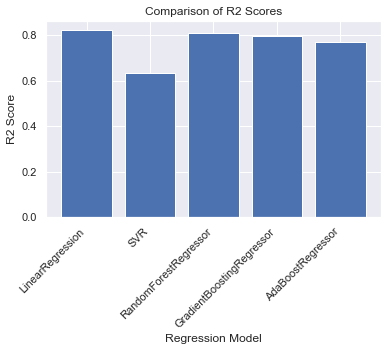

In [24]:
r2_scores = [score_dict[reg_name]["R2 Score"] for reg_name in score_dict]

plt.bar(range(len(score_dict)), r2_scores)
plt.xticks(range(len(score_dict)), list(score_dict.keys()), rotation=45, ha='right')
plt.xlabel("Regression Model")
plt.ylabel("R2 Score")
plt.title("Comparison of R2 Scores")

plt.subplots_adjust(bottom=0.2)

plt.show()

### Conclusion

Based on the provided metrics, you can make the following observations:<br>

-  LinearRegression has the highest R2 score (0.821) among the models, indicating a relatively good fit to the data.<br>
-  Random Forest Regressor and Gradient Boosting Regressor also have high R2 scores (0.809 and 0.796, respectively), suggesting good performance.<br>
-  AdaBoost Regressor has a slightly lower R2 score (0.787) but still performs reasonably well.<br>
-  SVR has a lower R2 score (0.635) compared to the other models, indicating a weaker fit to the data.<br>

In terms of MAE and MSE, LinearRegression has the lowest values, followed closely by Random Forest Regressor and Gradient Boosting Regressor. SVR has the highest MAE and MSE values among the models, indicating higher prediction errors.<br>
Based on these metrics, I would consider Linear Regression as the best model.

### Recommendations

-  Focus on CGPA: Since CGPA has the highest correlation with the "Chance of Admit," it is crucial for students to prioritize their academic performance. Strive to achieve a high CGPA by putting effort into coursework, assignments, and exams. Seek additional academic support if needed.<br>
-  Prepare for GRE and TOEFL: The GRE and TOEFL scores are important factors considered by universities during the admissions process. Dedicate time to prepare for these exams by using study materials, taking practice tests, and seeking guidance if required. Aim for competitive scores to increase your chances of admission.<br>
-  Enhance Statement of Purpose and Letters of Recommendation: The SOP and LOR play a role in the admissions process. Make sure to craft a compelling SOP that highlights your motivations, goals, and relevant experiences. Request LORs from individuals who can provide strong recommendations and showcase your abilities and potential.<br>
-  Consider University Ratings: The dataset includes a feature for university ratings. Research and consider universities with higher ratings as they may offer better opportunities and resources. However, keep in mind that university ratings should not be the sole determining factor. Consider other aspects such as faculty, research opportunities, program fit, and location.<br>
-  Research Experience: Although the correlation suggests that research has a relatively lower impact on admission chances, having research experience can still be beneficial. Engage in research projects or internships to gain practical knowledge and showcase your ability to contribute to the field. It can also set you apart from other applicants.<br>
-  Analyze Regression Model Results: Evaluate the performance of the different regression models (Linear Regression, Random Forest, SVR, Gradient Boosting, and Ada Boost) based on the provided metrics (R2 score, MAE, MSE). Identify the model that yields the best results and can provide accurate predictions. Consider the strengths and weaknesses of each model before making a final selection.<br>
-  Seek Guidance and Support: If you are unsure about the admissions process or need assistance in improving your profile, consider seeking guidance from mentors, professors, or professional counselors. They can provide valuable insights, personalized advice, and help you strategize your approach to maximize your chances of admission.